**Assignment1 -Parte 1 CIFAR-10**

Trabalho realizado por:

Telmo Cunha 2018308321


In [ ]:
import torch
import torch.nn as nn 
import torch.nn.functional as F
from torch.utils.data.sampler import SubsetRandomSampler # Sampler 

Arquitectura do modelo


In [ ]:
# Let's build your first CNN model

class nnModel(nn.Module):
  def __init__(self, number_of_classes=1):
    super(nnModel, self).__init__() # NN Module Initialization
    # 1st Convolutional layer
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
    
    # 2nd Convolutional layer
    self.conv2 = nn.Conv2d(in_channels=16, out_channels=64, kernel_size=3, stride=1, padding=1)
    self.pool1 = nn.MaxPool2d(2,2)
    
    #3nd convolutional layer
    self.conv3= nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
    
    #4nd convolutional layer
    self.conv4= nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
    self.pool2 = nn.MaxPool2d(2,2)
    
    #5nd convolutional layer
    self.conv5= nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1)
    self.pool3 = nn.MaxPool2d(2,2)

    #bacthnormalization(conv)
    self.batch1= nn.BatchNorm2d(16)
    self.batch2= nn.BatchNorm2d(64)
    self.batch3= nn.BatchNorm2d(128)
    self.batch4= nn.BatchNorm2d(256)
    self.batch5= nn.BatchNorm2d(512)

    #bacthnormalization(linear)
    self.batchl1= nn.BatchNorm1d(512)
    self.batchl2= nn.BatchNorm1d(256)
    


    # 1st Fully Connected layer (Linear layer)
    self.fc1 = nn.Linear(in_features=512*4*4, out_features=512)#16*32*32

    # 2nd Fully Connected Layer (linear Layer)
    self.fc2 = nn.Linear(in_features=512 ,out_features=256)

    #3nd fully connected layer
    self.fc3= nn.Linear(in_features=256, out_features=number_of_classes)
    
    # 2nd Fully Connected layer (Linear layer)
    #self.fc4 = nn.Linear(in_features=128, out_features=number_of_classes) # Last layer's output must be the same as the number of classes/categories 
 
    # Dropout
    self.dropout = nn.Dropout(p=0.25)
    

  def forward(self, x):
    # In "forward" function, you define the behaviour of your CNN
    # Activation functions are also implemented in "forward" function
    
    # 1st Convolutional layer
    x = F.relu(self.batch1(self.conv1(x)))
     
    # 2nd Convolutional layer
    x = F.relu(self.batch2(self.conv2(x)))
    x = self.pool1(x)

    #3nd Convolutional layer
    x= F.relu(self.batch3(self.conv3(x)))
    
    #4nd 
    x= F.relu(self.batch4(self.conv4(x)))
    x = self.pool2(x)

    #5nd
    x=F.relu(self.batch5(self.conv5(x)))
    x = self.pool3(x)
    

    # Before passing features to the linear layers, you need to "flatten" the features.
    flat_x = x.view(x.shape[0], -1)

    # 1st Fully Connected layer (Linear layer)
    flat_x = F.relu(self.batchl1(self.fc1(flat_x)))
    

    # 2nd Fully Connected layer (Linear layer)
    flat_x = F.relu(self.batchl2(self.fc2(flat_x))) # Usually, last layer does not need activation layer
    


    #flat_x= F.relu(self.fc3(flat_x))
    

    flat_x = self.dropout(flat_x)#evitar overfitting, aumenta a generalização

    flat_x= self.fc3(flat_x)

    return flat_x

In [ ]:
# Check your built CNN model
cnn_model = nnModel(10)
print("CNN Architecture: "+ str(cnn_model))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 
print('\nThe model will run on', device)
cnn_model = cnn_model.to(device)

# Using the torchsummary, you can check your network in more detail
import torchsummary
print("\n\n")
torchsummary.summary(cnn_model, input_size = (3, 32, 32), batch_size = 5) 


CNN Architecture: nnModel(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (batch1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch4): BatchNorm2d(256, eps=1e-05, momentum=

Dataset


In [ ]:
from torchvision . datasets import CIFAR10
import torchvision . transforms as tt
import numpy as np

transform_train2= tt.Compose([tt.ToTensor(),
                              tt.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

transform_train = tt.Compose([tt.ToTensor(),
                              tt.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)), #Normalize all the images
                              tt.RandomInvert(0.5),       
                              tt.RandomHorizontalFlip(0.5),       #Flips the image horizontal axis
                              tt.RandomRotation((-45,45))#Rotates the image to a specified angel 
                                                         
                              ])

#tt.ColorJitter(0.2,0.2,0.3,0.3), #brightness, contrast , saturation, hue  
transform = tt.Compose([tt.Resize((32,32)),
                         tt.ToTensor(),
                         tt.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                       ])

#transform = tt. ToTensor ()
training_data = CIFAR10 ( download =True , root ="./ data ",transform = transform_train )
training_data2 = CIFAR10 ( download =True , root ="./ data ",transform = transform_train2 )
training_data=torch.utils.data.ConcatDataset([training_data,training_data2]);

testing_data = CIFAR10 ( root ="./ data ",train =False , transform = transform )

# Lets start to obtain training indices
num_train = len(training_data)
print("Number of images in original training set: " + str(num_train)) # 60 000
indices = list(range(num_train))

# Randomly Shuffle
np.random.shuffle(indices)

# Split 80%/20%
split = int(np.floor(num_train * 0.2)) # 12 000
print("Split Number: " + str(split))
training_idx, valid_idx = indices[split:], indices[:split] # 48 000 / 12 000
print("Number of training images: " + str(len(training_idx)))
print("Number of validation images: " + str(len(valid_idx)))

# Lets also see how many images are on testing set
print("Number of images in the testing set: " + str(len(testing_data))) # 10 000

Files already downloaded and verified
Files already downloaded and verified
Number of images in original training set: 100000
Split Number: 20000
Number of training images: 80000
Number of validation images: 20000
Number of images in the testing set: 10000


In [ ]:
# To train the network, you must "encode" the data into a PyTorch dataloader
# Since you divided the original training set in 2, now you need to assign the indices to the samples
training_sampler = SubsetRandomSampler(training_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

batch_size = 128 # 100 images per batch and per epoch

# Training Set
training_loader = torch.utils.data.DataLoader(dataset = training_data, \
                                              batch_size = batch_size, \
                                              sampler = training_sampler)

# Validation Set
valid_loader = torch.utils.data.DataLoader(dataset = training_data, \
                                           batch_size = batch_size, \
                                           sampler = valid_sampler)

# Testing Set
# Here, you do not need the "sampler" input, since you did not change the original testing set
testing_loader = torch.utils.data.DataLoader(dataset = testing_data, \
                                           batch_size = batch_size, \
                                           shuffle = True)
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

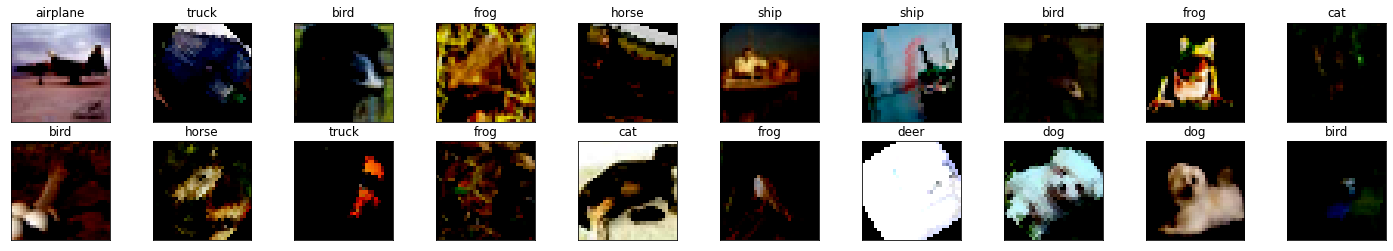

In [ ]:
# Visualization of 20 images in a batch
import matplotlib.pyplot as plt
%matplotlib inline

#função para anormalizar e mostar uma imagem
def imshow(img):
  immg= img / 2 + 0.5 #anormalização
  plt.imshow(np.transpose(img, (1, 2, 0))) 

#Get images
data_iter = iter(training_loader)
images, labels = data_iter.next()
images= images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25,4))

#display 20 images
for idx in np.arange(20):
  # Add a subplot for the image
  ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[] )
  # Subplot with the image
  imshow(images[idx] )
  # print out the correct label for each image
  ax.set_title(classes[labels[idx] ] )

Trainig


In [ ]:
# Library imports
import torch.optim as optim
import tensorflow as tf

In [ ]:
# To train a CNN, you must choose (or develop) a loss function, an optimizer algorithm, and a set of hyper-parameters (learning rate, number of epochs, etc)
# Hyper-parameters

num_epochs = 20
loss_values = []
lr=0.01  

# Loss Function
criterion = nn.CrossEntropyLoss() # Cross entropy loss function is widely used in classification problems


# Optimizer Algorithm
#optimizer = optim.Adam(cnn_model.parameters(), lr = lr)
optimizer = optim.RAdam(cnn_model.parameters(), lr = lr)
#optimizer =optim.RMSprop(cnn_model.parameters(),lr=lr)

# Training
running_loss = 0.0
training_loss =0.0

y_valid= list()
y_train= list()
#adaptive learning rate
#scheduler = optim.lr_scheduler.StepLR(optimizer,step_size=4,gamma=0.1)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer,mode='max',factor=0.1,patience=4)

for epoch in range(num_epochs):
  
  for batch_id, data in enumerate(training_loader, 0):
    
    #Get the images and their labels
    images, labels = data
    # Send the images and their labels to the training device
    images, labels = images.to(device), labels.to(device)

    # Pass images through the CNN
    outputs = cnn_model(images)

    # Create a loss value
    loss = criterion(outputs, labels)

    # Backpropagation
    optimizer.zero_grad() # zero the parameter gradients
    loss.backward()
    optimizer.step()

    # Check some statistics
    training_loss+= loss.item()
    running_loss += loss.item()
    if batch_id % 1000 == 999: # prints every 1000 batchs
      print('[%d, %5d] loss: %.3f' % (epoch + 1, batch_id + 1, running_loss / 1000))
      running_loss = 0.0
    
  y_train.append(training_loss/(len(training_idx)/batch_size))
  training_loss=0.0
  
  # For each epoch, analize the model performance
  valid_correct = 0
  valid_total = 0
  valid_total_loss = 0
  with torch.no_grad(): # In this part, you will not train, so you don't need to calculate gradients
    for valid_batch_id, valid_data in enumerate(valid_loader, 0):
      valid_images, valid_labels = valid_data
      valid_images, valid_labels = valid_images.to(device), valid_labels.to(device)
      valid_outputs = cnn_model(valid_images)
      valid_loss = criterion(valid_outputs, valid_labels)
      valid_total_loss += valid_loss.item()
      _, valid_predicted = torch.max(valid_outputs.data, 1)
      valid_total += valid_labels.size(0)
      valid_correct += (valid_predicted == valid_labels).sum().item()
  
  validation_loss= valid_total_loss/len(valid_idx)
  loss_values.append(validation_loss)
  y_valid.append(valid_total_loss/(len(valid_idx)/batch_size))
  print("(Validation Set) Epoch: " + str(epoch + 1) + " Loss: " + str(valid_total_loss/ len(valid_idx)) + " Acc: " + str(100*valid_correct/valid_total))
  print('Epoch-{0} lr: {1}'.format(epoch, optimizer.param_groups[0]['lr']))
  scheduler.step(loss)


print("Training is completed!")

(Validation Set) Epoch: 1 Loss: 0.008355844873189926 Acc: 62.635
Epoch-0 lr: 0.01
(Validation Set) Epoch: 2 Loss: 0.00673423764705658 Acc: 70.565
Epoch-1 lr: 0.01
(Validation Set) Epoch: 3 Loss: 0.006114205859601498 Acc: 73.22
Epoch-2 lr: 0.01
(Validation Set) Epoch: 4 Loss: 0.005622338217496872 Acc: 76.015
Epoch-3 lr: 0.01
(Validation Set) Epoch: 5 Loss: 0.005038422723114491 Acc: 78.475
Epoch-4 lr: 0.01
(Validation Set) Epoch: 6 Loss: 0.004797113519906998 Acc: 79.495
Epoch-5 lr: 0.01
(Validation Set) Epoch: 7 Loss: 0.003743639752268791 Acc: 84.345
Epoch-6 lr: 0.001
(Validation Set) Epoch: 8 Loss: 0.0036297345228493215 Acc: 85.05
Epoch-7 lr: 0.001
(Validation Set) Epoch: 9 Loss: 0.003611085417121649 Acc: 85.13
Epoch-8 lr: 0.001
(Validation Set) Epoch: 10 Loss: 0.0035558509148657324 Acc: 85.505
Epoch-9 lr: 0.001
(Validation Set) Epoch: 11 Loss: 0.0034580409437417986 Acc: 86.195
Epoch-10 lr: 0.001
(Validation Set) Epoch: 12 Loss: 0.0032958341278135775 Acc: 86.81
Epoch-11 lr: 0.0001
(Vali

Loss per epoch

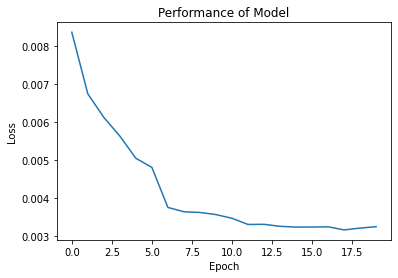

In [ ]:
plt.plot(loss_values)
plt.xlabel ("Epoch")
plt.ylabel ("Loss")
plt.title ("Performance of Model")
plt.show()

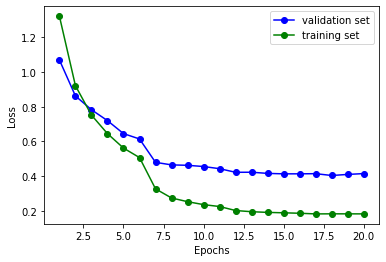

In [ ]:
# plot  
x = list(range(1, num_epochs+1))
plt.plot(x, y_valid, 'bo-', label ='validation set')
plt.plot(x, y_train, 'go-', label ='training set')

plt.xlabel("Epochs")
plt.ylabel("Loss")
  
# Function add a legend  
plt.legend()
  
# function to show the plot
plt.show()

Testing

Accuracy using 10000 test images: 87.87 %

Accuracy of  0 : 88 % in 1000 Images
Accuracy of  1 : 95 % in 1000 Images
Accuracy of  2 : 84 % in 1000 Images
Accuracy of  3 : 75 % in 1000 Images
Accuracy of  4 : 87 % in 1000 Images
Accuracy of  5 : 81 % in 1000 Images
Accuracy of  6 : 90 % in 1000 Images
Accuracy of  7 : 90 % in 1000 Images
Accuracy of  8 : 93 % in 1000 Images
Accuracy of  9 : 91 % in 1000 Images

Confusion Matrix
[[885   2  30  10   5   5   4   5  23  15]
 [ 10 952   1   4   0   4   1   0  15  40]
 [ 26   1 841  38  24  18  23   8   5   5]
 [ 11   1  30 758  32 104  37  22   3   2]
 [ 11   1  42  32 876  23  15  22   2   0]
 [  1   0  20  93  22 818   9  29   5   1]
 [  3   1  24  28  16   6 900   1   2   1]
 [  6   1   7  22  19  20   3 906   1   2]
 [ 33   8   3   7   6   1   5   2 932  15]
 [ 14  33   2   8   0   1   3   5  12 919]]




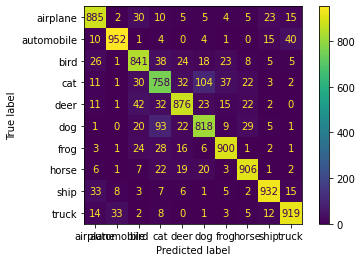


Global F1 score:81.25
Mean F1 score:80.17857142857143
Mean precision:84.375
Mean recall 81.25


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import ConfusionMatrixDisplay
# Evaluate a CNN is similar to the training process without the backpropagation.
# To evaluate a CNN, we need to follow the evaluation metrics
num_classes = 10
correct = 0
total = 0
class_correct = list(0. for i in range(num_classes))
class_total = list(0. for i in range(num_classes))
conf_matrix =[[0 for x in range(num_classes)] for y in range(num_classes)]

cnn_model.eval()

with torch.no_grad(): # You are not training, so you don't need to calculate gradients
  for batch_id, data in enumerate(testing_loader, 0):
    # Get the images and their labels
    images, labels = data
    # Send the images and their labels to the training device
    images, labels = images.to(device), labels.to(device)

    # Calculate the CNN's predictions by running images through the network
    outputs = cnn_model(images)

    # The class with the highest
    _, predicted = torch.max(outputs.data, 1)

    # Get model's performance
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    c = (predicted == labels).squeeze()

    for i in range(len(images)):  
      label = labels[i]
      class_correct[label] += c[i].item()
      class_total[label] += 1

    conf_matrix += confusion_matrix(predicted.cpu(),labels.cpu(),labels=[x for x in range(num_classes)])

# Show model's performance
print('Accuracy using {} test images: {} %\n'.format(total,100 * correct / total))
# Performance per Class
for i in range(num_classes):
  if class_total[i] == 0:
    print('Accuracy of %2s : %2d %% in %d Images' % (i, 0, 0))
  else:
    print('Accuracy of %2s : %2d %% in %d Images' % (i, 100 * class_correct[i] / class_total[i], class_total[i]))

# Confusion Matrix
print('\nConfusion Matrix')
print(conf_matrix) 

print('\n')
conf_disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, 
                       display_labels = classes)
conf_disp.plot()
plt.show()

f1micro = f1_score(labels.cpu(),predicted.cpu(),average="micro")
f1mean = f1_score(labels.cpu(),predicted.cpu(),average="weighted")
precision=precision_score(labels.cpu(),predicted.cpu(),average="weighted")
recall=recall_score(labels.cpu(),predicted.cpu(),average="weighted")


print("\nGlobal F1 score:"+str(f1micro*100))
print("Mean F1 score:"+str(f1mean*100))
print("Mean precision:"+str(precision*100))
print("Mean recall", str(recall*100))
